## Calculate moving avegare

In [375]:
import pandas as pd

In [376]:
import matplotlib.pyplot as plt

In [377]:
#import pip

In [378]:
#pip.main(['install','pandas_datareader'] )

In [379]:
from pandas_datareader import data, wb, Options
import datetime

In [380]:
g1=data.DataReader('INFY.NS', 'yahoo','2016-01-01')

In [381]:
g1['Avg']=(g1.Open + g1.Close)/2

In [382]:
d5=g1.Avg.rolling(window=20)

In [383]:
d20=g1.Avg.rolling(window=100)

In [386]:
g1=pd.concat([g1, pd.Series(d5.mean(), name='MA20'),pd.Series(d20.mean(),name='MA100')], axis=1).dropna()

In [394]:
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc
from matplotlib.dates import date2num, DateFormatter
from datetime import datetime

In [395]:
date_format=DateFormatter('%b %y')

In [396]:
g1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2016-05-19 to 2017-01-20
Data columns (total 9 columns):
Open         177 non-null float64
High         177 non-null float64
Low          177 non-null float64
Close        177 non-null float64
Volume       177 non-null int64
Adj Close    177 non-null float64
Avg          177 non-null float64
MA20         177 non-null float64
MA100        177 non-null float64
dtypes: float64(8), int64(1)
memory usage: 13.8 KB


In [400]:
g1['Dates']=mdates.date2num(g1.index.to_pydatetime())

In [404]:
dataAr=[tuple(x) for x in g1[['Dates','Open','High','Low','Close', 'Volume']].to_records(index=False)]

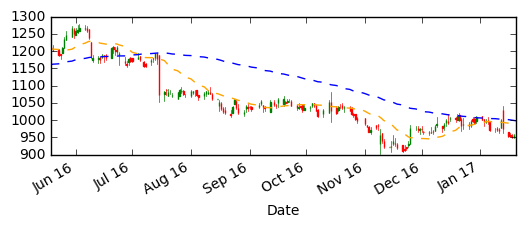

In [406]:
fig,ax=plt.subplots()
ax = plt.subplot2grid((12, 6), (0, 0), rowspan = 6, colspan = 6, axisbg = 'white')
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_format)
mlp=candlestick_ohlc(ax, dataAr, width=0.2, colorup='g', colordown='r' )
g1.MA20.plot(style='--',color='orange')
g1.MA100.plot(style='--', color='blue')
plt.show()

## Calculate reinvestment options

In [174]:
share_price=642
moving_avg=630
hold_volume=27
hold_price=104
count=0

def calculate_hold_price(share_price=share_price, hold_volume=hold_volume, 
                     hold_price=hold_price, moving_avg=moving_avg,   extra=0):
    #new_hold_price=((hold_volume + extra) * share_price - hold_price * hold_volume) / hold_volume + extra
    
    new_hold_price=(hold_volume*hold_price+extra*share_price)/(hold_volume+extra)
    return new_hold_price

new_hold_price=0

while new_hold_price < moving_avg*2/3 :
    prev_hold_price=new_hold_price
    new_hold_price=calculate_hold_price(extra=count)
    if new_hold_price >= moving_avg*2/3:
        break
    count +=1
count -= 1 
new_hold_volume=hold_volume+count  
print(share_price, moving_avg, int(prev_hold_price), new_hold_volume, count)
   

642 630 418 65 38
